# Kaggle Datasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from datetime import datetime, timedelta
set_style("whitegrid")

In [5]:
# huge dataset with 20 million rows
df = pd.read_csv('historical_stock_prices.csv')
df

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14
...,...,...,...,...,...,...,...,...
20973884,NZF,14.60,14.59,14.590000,14.58,14.62,137500,2018-08-20
20973885,NZF,14.60,14.58,14.580000,14.57,14.61,151200,2018-08-21
20973886,NZF,14.58,14.59,14.590000,14.57,14.63,185400,2018-08-22
20973887,NZF,14.60,14.57,14.570000,14.57,14.64,135600,2018-08-23


In [6]:
# grabbing just those with code AHH = Armada Hoffler Properties
df[df['ticker']=='AHH']

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.580000,8.493155,11.25,11.680000,4633900,2013-05-08
1,AHH,11.66,11.550000,8.471151,11.50,11.660000,275800,2013-05-09
2,AHH,11.55,11.600000,8.507822,11.50,11.600000,277100,2013-05-10
3,AHH,11.63,11.650000,8.544494,11.55,11.650000,147400,2013-05-13
4,AHH,11.60,11.530000,8.456484,11.50,11.600000,184100,2013-05-14
...,...,...,...,...,...,...,...,...
11795,AHH,16.00,16.040001,16.040001,15.95,16.139999,229100,2018-08-20
11799,AHH,16.02,16.100000,16.100000,15.98,16.170000,235400,2018-08-21
11816,AHH,16.07,15.870000,15.870000,15.85,16.120001,191800,2018-08-22
11820,AHH,15.84,15.860000,15.860000,15.81,15.900000,166600,2018-08-23


In [7]:
# turn a date string into a datetime object; then the library can tell us the day of the week of the date
# thought it would be useful; 0=Monday,...,6=Sunday
datetime.strptime(df['date'].loc[2],'%Y-%m-%d').weekday()

4

In [8]:
# getting the codes that tell us what the stocks are; e.g. PIH = Property Insurance Holdings
df2=pd.read_csv('historical_stocks.csv')
df2.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [9]:
df2.info

<bound method DataFrame.info of      ticker exchange                                    name  \
0       PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.   
1     PIHPP   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.   
2      TURN   NASDAQ                180 DEGREE CAPITAL CORP.   
3      FLWS   NASDAQ                 1-800 FLOWERS.COM, INC.   
4      FCCY   NASDAQ           1ST CONSTITUTION BANCORP (NJ)   
...     ...      ...                                     ...   
6455   ZOES     NYSE                 ZOE&#39;S KITCHEN, INC.   
6456    ZTS     NYSE                             ZOETIS INC.   
6457    ZTO     NYSE               ZTO EXPRESS (CAYMAN) INC.   
6458    ZUO     NYSE                             ZUORA, INC.   
6459   ZYME     NYSE                          ZYMEWORKS INC.   

                 sector                                 industry  
0               FINANCE               PROPERTY-CASUALTY INSURERS  
1               FINANCE               PROPERTY-CASUALTY INSURERS 

In [10]:
# learn what the sectors are; seems there are 11 sectors if we don't count, nan, Misc, and Sector
df2['sector'].unique()

array(['FINANCE', 'CONSUMER SERVICES', 'TECHNOLOGY', 'PUBLIC UTILITIES',
       'CAPITAL GOODS', 'BASIC INDUSTRIES', 'HEALTH CARE',
       'CONSUMER DURABLES', nan, 'ENERGY', 'MISCELLANEOUS', 'SECTOR',
       'TRANSPORTATION', 'CONSUMER NON-DURABLES'], dtype=object)

In [11]:
# get all the rows for AHH, get the full name as well from df2

df_AHH=df[df['ticker']=='AHH'].reset_index()
print(df2[df2['ticker']=='AHH'])
df_AHH

     ticker exchange                             name   sector     industry
3543    AHH     NYSE  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE


,index,ticker,open,close,adj_close,low,high,volume,date
0,0,AHH,11.50,11.580000,8.493155,11.25,11.680000,4633900,2013-05-08
1,1,AHH,11.66,11.550000,8.471151,11.50,11.660000,275800,2013-05-09
2,2,AHH,11.55,11.600000,8.507822,11.50,11.600000,277100,2013-05-10
3,3,AHH,11.63,11.650000,8.544494,11.55,11.650000,147400,2013-05-13
4,4,AHH,11.60,11.530000,8.456484,11.50,11.600000,184100,2013-05-14
...,...,...,...,...,...,...,...,...,...
1331,11795,AHH,16.00,16.040001,16.040001,15.95,16.139999,229100,2018-08-20
1332,11799,AHH,16.02,16.100000,16.100000,15.98,16.170000,235400,2018-08-21
1333,11816,AHH,16.07,15.870000,15.870000,15.85,16.120001,191800,2018-08-22
1334,11820,AHH,15.84,15.860000,15.860000,15.81,15.900000,166600,2018-08-23


In [12]:
# get all the stocks in transportation
transportation = df2[df2['sector']=='TRANSPORTATION'][['ticker','name']]
transportation.sample(10)

,ticker,name
5792,SALT,SCORPIO BULKERS INC.
2642,SAIA,"SAIA, INC."
1483,HUNT,HUNTER MARITIME ACQUISITION CORP.
4957,KNX,"KNIGHT TRANSPORTATION, INC."
4912,KSU^,KANSAS CITY SOUTHERN
2743,SINO,"SINO-GLOBAL SHIPPING AMERICA, LTD."
2991,TRMD,TORM PLC
5732,RRTS,"ROADRUNNER TRANSPORTATION SYSTEMS, INC"
2816,SBLKZ,STAR BULK CARRIERS CORP.
5805,SMHI,SEACOR MARINE HOLDINGS INC.


In [13]:
# getting Union Pacific stocks
df_UNP=df[df['ticker']=='UNP'].reset_index()
print(df2[df2['ticker']=='UNP'])
df_UNP

     ticker exchange                       name          sector   industry
6209    UNP     NYSE  UNION PACIFIC CORPORATION  TRANSPORTATION  RAILROADS


,index,ticker,open,close,adj_close,low,high,volume,date
0,20706536,UNP,3.010041,3.015294,0.017573,3.010041,3.052066,1165600,1980-01-02
1,20706538,UNP,2.994281,2.973269,0.017328,2.947003,2.994281,1453600,1980-01-03
2,20706540,UNP,2.978522,3.025800,0.017634,2.978522,3.025800,1382400,1980-01-04
3,20706542,UNP,3.025800,3.010041,0.017542,3.010041,3.052066,1087200,1980-01-07
4,20706544,UNP,3.010041,2.899725,0.016899,2.899725,3.036306,1213200,1980-01-08
...,...,...,...,...,...,...,...,...,...
9743,20723264,UNP,150.220001,150.850006,150.850006,150.139999,151.789993,3275000,2018-08-20
9744,20723266,UNP,150.789993,151.559998,151.559998,150.619995,151.970001,3061300,2018-08-21
9745,20723268,UNP,151.130005,150.320007,150.320007,150.210007,151.440002,2395700,2018-08-22
9746,20723270,UNP,150.429993,150.240005,150.240005,149.570007,150.740005,2012700,2018-08-23


In [14]:
# Union Pacific is older than Armada Hoffler so we want to know how much to shift 
# the index by when plotting time series

print(df_UNP[df_UNP['date']=='2013-05-08'])

         index ticker       open      close  adj_close    low       high  \
8412  20720585    UNP  76.525002  77.690002   67.97213  76.25  77.724998   

       volume        date  
8412  3576400  2013-05-08  


In [15]:
# reindexing AHH; shift by 8412, relative to Union Pacific
df_AHH.index=[8412+i for i in range(len(df_AHH))]
df_AHH

,index,ticker,open,close,adj_close,low,high,volume,date
8412,0,AHH,11.50,11.580000,8.493155,11.25,11.680000,4633900,2013-05-08
8413,1,AHH,11.66,11.550000,8.471151,11.50,11.660000,275800,2013-05-09
8414,2,AHH,11.55,11.600000,8.507822,11.50,11.600000,277100,2013-05-10
8415,3,AHH,11.63,11.650000,8.544494,11.55,11.650000,147400,2013-05-13
8416,4,AHH,11.60,11.530000,8.456484,11.50,11.600000,184100,2013-05-14
...,...,...,...,...,...,...,...,...,...
9743,11795,AHH,16.00,16.040001,16.040001,15.95,16.139999,229100,2018-08-20
9744,11799,AHH,16.02,16.100000,16.100000,15.98,16.170000,235400,2018-08-21
9745,11816,AHH,16.07,15.870000,15.870000,15.85,16.120001,191800,2018-08-22
9746,11820,AHH,15.84,15.860000,15.860000,15.81,15.900000,166600,2018-08-23


In [16]:
# getting American Airlines
df_AAL=df[df['ticker']=='AAL'].reset_index()
print(df2[df2['ticker']=='AAL'])
df_AAL

    ticker exchange                           name          sector  \
150    AAL   NASDAQ  AMERICAN AIRLINES GROUP, INC.  TRANSPORTATION   

                          industry  
150  AIR FREIGHT/DELIVERY SERVICES  


,index,ticker,open,close,adj_close,low,high,volume,date
0,6063950,AAL,21.049999,19.299999,18.540155,19.100000,21.400000,961200,2005-09-27
1,6063966,AAL,19.299999,20.500000,19.692907,19.200001,20.530001,5747900,2005-09-28
2,6063970,AAL,20.400000,20.209999,19.414324,20.100000,20.580000,1078200,2005-09-29
3,6063986,AAL,20.260000,21.010000,20.182831,20.180000,21.049999,3123300,2005-09-30
4,6063990,AAL,20.900000,21.500000,20.653534,20.900000,21.750000,1057900,2005-10-03
...,...,...,...,...,...,...,...,...,...
3246,6096213,AAL,38.040001,39.990002,39.990002,37.990002,40.099998,9628900,2018-08-20
3247,6096229,AAL,39.980000,40.330002,40.330002,39.840000,40.709999,6491800,2018-08-21
3248,6096235,AAL,40.080002,39.189999,39.189999,39.139999,40.189999,5593100,2018-08-22
3249,6096250,AAL,39.189999,38.830002,38.830002,38.720001,39.389999,3931900,2018-08-23


In [17]:
# getting the integer to shift the index by
print(df_UNP[df_UNP['date']=='2005-09-27'])

         index ticker       open      close  adj_close      low     high  \
6497  20716703    UNP  17.065001  17.137501  10.742535  16.9475  17.1975   

       volume        date  
6497  4616800  2005-09-27  


In [18]:
# shifting index
df_AAL.index=[6497+i for i in range(len(df_AAL))]
df_AAL

,index,ticker,open,close,adj_close,low,high,volume,date
6497,6063950,AAL,21.049999,19.299999,18.540155,19.100000,21.400000,961200,2005-09-27
6498,6063966,AAL,19.299999,20.500000,19.692907,19.200001,20.530001,5747900,2005-09-28
6499,6063970,AAL,20.400000,20.209999,19.414324,20.100000,20.580000,1078200,2005-09-29
6500,6063986,AAL,20.260000,21.010000,20.182831,20.180000,21.049999,3123300,2005-09-30
6501,6063990,AAL,20.900000,21.500000,20.653534,20.900000,21.750000,1057900,2005-10-03
...,...,...,...,...,...,...,...,...,...
9743,6096213,AAL,38.040001,39.990002,39.990002,37.990002,40.099998,9628900,2018-08-20
9744,6096229,AAL,39.980000,40.330002,40.330002,39.840000,40.709999,6491800,2018-08-21
9745,6096235,AAL,40.080002,39.189999,39.189999,39.139999,40.189999,5593100,2018-08-22
9746,6096250,AAL,39.189999,38.830002,38.830002,38.720001,39.389999,3931900,2018-08-23


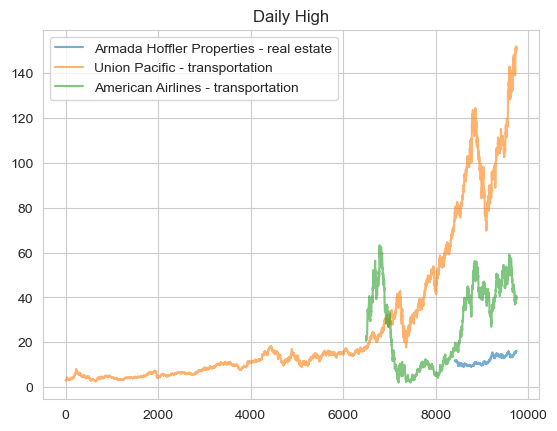

In [19]:
# plotting the three; seems transportation is at a higher scale than real estate

plt.plot(df_AHH.index,df_AHH['high'],label='Armada Hoffler Properties - real estate',alpha=0.6)
plt.plot(df_UNP.index,df_UNP['high'],label='Union Pacific - transportation',alpha=0.6)
plt.plot(df_AAL.index,df_AAL['high'],label='American Airlines - transportation',alpha=0.6)
plt.title('Daily High')
plt.legend()
plt.show()

In [20]:
# how many data points for Union Pacific? the data runs from 1980 to 2018. We see there are many days missing
start_UNP=df_UNP.loc[0]['date']
end_UNP = df_UNP.loc[len(df_UNP)-1]['date']
start_date_UNP=datetime.strptime(start_UNP,'%Y-%m-%d')
end_date_UNP=datetime.strptime(end_UNP,'%Y-%m-%d')
print(start_date_UNP,'  ' ,end_date_UNP)
print('The number of days between the start and end date for UNP:', str((end_date_UNP-start_date_UNP).days))
print('The number of days in the dataframe for UNP:', str(len(df_UNP)))
print('The number of missing days of data:', str((end_date_UNP-start_date_UNP).days-len(df_UNP)) )

1980-01-02 00:00:00    2018-08-24 00:00:00
The number of days between the start and end date for UNP: 14114
The number of days in the dataframe for UNP: 9748
The number of missing days of data: 4366


There are many days missing in the UNP data between Jan 2, 1980 and Aug 24, 2018. So to plot the time series data, we need to do something about the days that are missing. Should we just let it be constant? Assume the values are the same for all the missing days?

In [21]:
df_UNP

,index,ticker,open,close,adj_close,low,high,volume,date
0,20706536,UNP,3.010041,3.015294,0.017573,3.010041,3.052066,1165600,1980-01-02
1,20706538,UNP,2.994281,2.973269,0.017328,2.947003,2.994281,1453600,1980-01-03
2,20706540,UNP,2.978522,3.025800,0.017634,2.978522,3.025800,1382400,1980-01-04
3,20706542,UNP,3.025800,3.010041,0.017542,3.010041,3.052066,1087200,1980-01-07
4,20706544,UNP,3.010041,2.899725,0.016899,2.899725,3.036306,1213200,1980-01-08
...,...,...,...,...,...,...,...,...,...
9743,20723264,UNP,150.220001,150.850006,150.850006,150.139999,151.789993,3275000,2018-08-20
9744,20723266,UNP,150.789993,151.559998,151.559998,150.619995,151.970001,3061300,2018-08-21
9745,20723268,UNP,151.130005,150.320007,150.320007,150.210007,151.440002,2395700,2018-08-22
9746,20723270,UNP,150.429993,150.240005,150.240005,149.570007,150.740005,2012700,2018-08-23


In [22]:
df_UNP['date_time'] = df_UNP['date'].apply(lambda day: datetime.strptime(day,'%Y-%m-%d').date()) 
# don't want time, only date

In [23]:
#df_UNP.drop('date_time',axis=1,inplace=True) # in case I add datetime twice
df_UNP

,index,ticker,open,close,adj_close,low,high,volume,date,date_time
0,20706536,UNP,3.010041,3.015294,0.017573,3.010041,3.052066,1165600,1980-01-02,1980-01-02
1,20706538,UNP,2.994281,2.973269,0.017328,2.947003,2.994281,1453600,1980-01-03,1980-01-03
2,20706540,UNP,2.978522,3.025800,0.017634,2.978522,3.025800,1382400,1980-01-04,1980-01-04
3,20706542,UNP,3.025800,3.010041,0.017542,3.010041,3.052066,1087200,1980-01-07,1980-01-07
4,20706544,UNP,3.010041,2.899725,0.016899,2.899725,3.036306,1213200,1980-01-08,1980-01-08
...,...,...,...,...,...,...,...,...,...,...
9743,20723264,UNP,150.220001,150.850006,150.850006,150.139999,151.789993,3275000,2018-08-20,2018-08-20
9744,20723266,UNP,150.789993,151.559998,151.559998,150.619995,151.970001,3061300,2018-08-21,2018-08-21
9745,20723268,UNP,151.130005,150.320007,150.320007,150.210007,151.440002,2395700,2018-08-22,2018-08-22
9746,20723270,UNP,150.429993,150.240005,150.240005,149.570007,150.740005,2012700,2018-08-23,2018-08-23


In [24]:
df_UNP['date_time'].loc[0]

datetime.date(1980, 1, 2)

In [25]:
def custom_time_indexing(df, date_column):
    """
    Function to reindex a DataFrame with a custom index that reflects gaps in a time series,
    while keeping the original date column for plotting, without modifying the original DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    date_column (str): Name of the column containing datetime objects.

    Returns:
    pd.DataFrame: A new DataFrame with the custom index reflecting date gaps,
                  while retaining the original dates in a new column.
    list: A list of the original date labels corresponding to valid data rows.
    """
    # Work on a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Ensure the date_column is of datetime type
    df_copy[date_column] = pd.to_datetime(df_copy[date_column])

    # Set the date column as the index
    df_copy.set_index(date_column, inplace=True)

    # Generate the full date range (including missing dates)
    full_range = pd.date_range(start=df_copy.index.min(), end=df_copy.index.max())

    # Reindex the DataFrame to include the full range of dates
    df_reindexed = df_copy.reindex(full_range)

    # Create a custom index that increments by 1, but jumps when there are missing dates
    custom_index = []
    current_index = 1

    for i in range(len(df_reindexed)):
        if i == 0:
            custom_index.append(current_index)
        else:
            # Check if the current date is consecutive to the previous one
            if df_reindexed.index[i] - df_reindexed.index[i-1] > timedelta(days=1):
                # Increase the custom index by the actual day difference
                current_index += (df_reindexed.index[i] - df_reindexed.index[i-1]).days
            else:
                current_index += 1
            custom_index.append(current_index)

    # Assign the custom index to the DataFrame
    df_reindexed['custom_index'] = custom_index

    # Drop the rows where there are missing values
    df_final = df_reindexed.dropna()

    # Add the original date index as a new column
    df_final['original_date'] = df_final.index

    # Set the new custom index
    df_final.set_index('custom_index', inplace=True)

    # Return the final DataFrame and the valid original dates
    return df_final, df_final['original_date']


In [26]:
df_UNP_time_reindexed,valid_dates = custom_time_indexing(df_UNP, 'date_time')

/var/folders/4l/xdk1tfxx7jbd3zsydcl3t4vh0000gn/T/ipykernel_7302/1020873027.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['original_date'] = df_final.index


In [27]:
df_UNP

,index,ticker,open,close,adj_close,low,high,volume,date,date_time
0,20706536,UNP,3.010041,3.015294,0.017573,3.010041,3.052066,1165600,1980-01-02,1980-01-02
1,20706538,UNP,2.994281,2.973269,0.017328,2.947003,2.994281,1453600,1980-01-03,1980-01-03
2,20706540,UNP,2.978522,3.025800,0.017634,2.978522,3.025800,1382400,1980-01-04,1980-01-04
3,20706542,UNP,3.025800,3.010041,0.017542,3.010041,3.052066,1087200,1980-01-07,1980-01-07
4,20706544,UNP,3.010041,2.899725,0.016899,2.899725,3.036306,1213200,1980-01-08,1980-01-08
...,...,...,...,...,...,...,...,...,...,...
9743,20723264,UNP,150.220001,150.850006,150.850006,150.139999,151.789993,3275000,2018-08-20,2018-08-20
9744,20723266,UNP,150.789993,151.559998,151.559998,150.619995,151.970001,3061300,2018-08-21,2018-08-21
9745,20723268,UNP,151.130005,150.320007,150.320007,150.210007,151.440002,2395700,2018-08-22,2018-08-22
9746,20723270,UNP,150.429993,150.240005,150.240005,149.570007,150.740005,2012700,2018-08-23,2018-08-23


In [28]:
df_UNP_time_reindexed

,index,ticker,open,close,adj_close,low,high,volume,date,original_date
custom_index,,,,,,,,,,
1,20706536.0,UNP,3.010041,3.015294,0.017573,3.010041,3.052066,1165600.0,1980-01-02,1980-01-02
2,20706538.0,UNP,2.994281,2.973269,0.017328,2.947003,2.994281,1453600.0,1980-01-03,1980-01-03
3,20706540.0,UNP,2.978522,3.025800,0.017634,2.978522,3.025800,1382400.0,1980-01-04,1980-01-04
6,20706542.0,UNP,3.025800,3.010041,0.017542,3.010041,3.052066,1087200.0,1980-01-07,1980-01-07
7,20706544.0,UNP,3.010041,2.899725,0.016899,2.899725,3.036306,1213200.0,1980-01-08,1980-01-08
...,...,...,...,...,...,...,...,...,...,...
14111,20723264.0,UNP,150.220001,150.850006,150.850006,150.139999,151.789993,3275000.0,2018-08-20,2018-08-20
14112,20723266.0,UNP,150.789993,151.559998,151.559998,150.619995,151.970001,3061300.0,2018-08-21,2018-08-21
14113,20723268.0,UNP,151.130005,150.320007,150.320007,150.210007,151.440002,2395700.0,2018-08-22,2018-08-22


In [29]:
valid_dates # for UNP

custom_index
1       1980-01-02
2       1980-01-03
3       1980-01-04
6       1980-01-07
7       1980-01-08
           ...    
14111   2018-08-20
14112   2018-08-21
14113   2018-08-22
14114   2018-08-23
14115   2018-08-24
Name: original_date, Length: 9748, dtype: datetime64[ns]

In [30]:
valid_dates = valid_dates.apply(lambda day: day.date())
# make the datetime objects only have dates, no times; makes plotting nicer

In [31]:
valid_dates.iloc[0] #check

datetime.date(1980, 1, 2)

In [32]:
len(df_UNP_time_reindexed)

9748

In [33]:
# because of missing dates, we have to do some annoying stuff there are about 14000 days between the first
# and last day for UNP but some dates are skipped and so we have only 9400 or so datapoints
# to properly plot, we will get some evenly spaced segments and then get the correct corresponding days

start_date = pd.to_datetime('1980-01-02')
end_date = pd.to_datetime('2018-08-24')

# Calculate the total number of days in the range
total_days = (end_date - start_date).days

# Number of segments
num_segments = 9 # one less than the number of ticks desired

# Calculate the length of each segment in days
segment_length = total_days / num_segments

# Create a list to hold the tick mark dates
tick_dates = []

# Calculate the dates for each tick mark
for i in range(num_segments + 1):
    tick_date = start_date + timedelta(days=segment_length * i)
    tick_dates.append(tick_date.date())

# Convert tick_dates to a list of strings for labeling
tick_labels = [date.strftime('%Y-%m-%d') for date in tick_dates]

# Print out the tick dates and labels
print("Tick Dates:", tick_dates)
print("Tick Labels:", tick_labels)

len(tick_labels)

Tick Dates: [datetime.date(1980, 1, 2), datetime.date(1984, 4, 18), datetime.date(1988, 8, 3), datetime.date(1992, 11, 18), datetime.date(1997, 3, 5), datetime.date(2001, 6, 21), datetime.date(2005, 10, 6), datetime.date(2010, 1, 21), datetime.date(2014, 5, 8), datetime.date(2018, 8, 24)]
Tick Labels: ['1980-01-02', '1984-04-18', '1988-08-03', '1992-11-18', '1997-03-05', '2001-06-21', '2005-10-06', '2010-01-21', '2014-05-08', '2018-08-24']


10

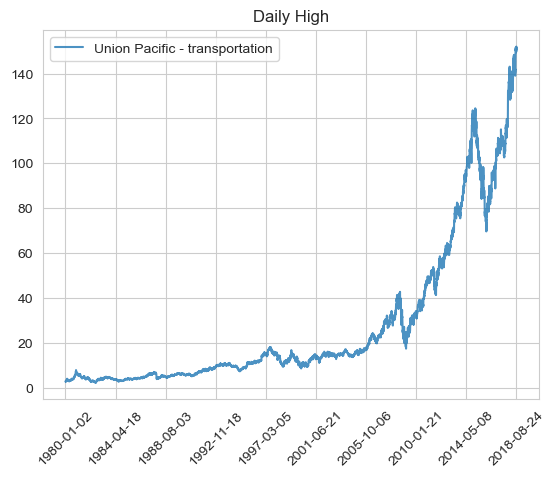

In [34]:
# we can plot Union Pacific now with the missing dates, it seems to know to plot the years on the x-axis now
# the issue is that it's not correctly spaced; the skips in time might not always be the same amount
#plt.plot(df_UNP.index,df_UNP['high'],label='Union Pacific - transportation',alpha=0.4)

plt.plot(df_UNP_time_reindexed.index,df_UNP_time_reindexed['high'],label='Union Pacific - transportation',alpha=0.8)
plt.title('Daily High')

num_entries = df_UNP_time_reindexed.index.max()

# Set a desired number of ticks; in the cell above, we had num_segments = 9 (one less than num_ticks)
num_ticks = 10

# Generate equally spaced tick positions
tick_positions = np.linspace(0, num_entries - 1, num_ticks).astype(int)

# Set the ticks and their corresponding labels from the original dates
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

# Set x-axis limits to span the full range of the custom index
#plt.xlim(df_UNP_time_reindexed.index.min(), df_UNP_time_reindexed.index.max())

plt.legend()
plt.show()

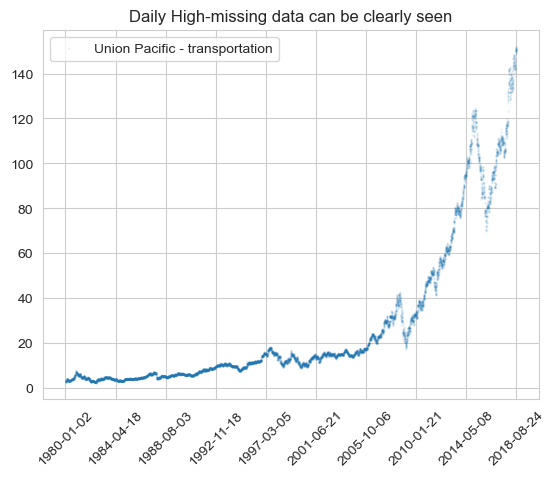

In [35]:
# we can plot Union Pacific now with the missing dates, it seems to know to plot the years on the x-axis now
# the issue is that it's not correctly spaced; the skips in time might not always be the same amount
#plt.plot(df_UNP.index,df_UNP['high'],label='Union Pacific - transportation',alpha=0.4)

plt.scatter(df_UNP_time_reindexed.index,df_UNP_time_reindexed['high'],label='Union Pacific - transportation',alpha=0.1,s=0.4)
plt.title('Daily High-missing data can be clearly seen')

num_entries = df_UNP_time_reindexed.index.max()

# Set a desired number of ticks; in the cell above, we had num_segments = 9 (one less than num_ticks)
num_ticks = 10

# Generate equally spaced tick positions
tick_positions = np.linspace(0, num_entries - 1, num_ticks).astype(int)

# Set the ticks and their corresponding labels from the original dates
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

# Set x-axis limits to span the full range of the custom index
#plt.xlim(df_UNP_time_reindexed.index.min(), df_UNP_time_reindexed.index.max())

plt.legend()
plt.show()

In [73]:
# Seems there was a bit of a fall for UNP around 2008. Maybe it was September 29, 2008 when the market crashed
crash_date = pd.to_datetime('2008-09-29')
crash_date = crash_date.date()

sell_off_date=pd.to_datetime('2015-06-01')
sell_off_date=sell_off_date.date()


datetime.date(1980, 1, 2)

In [74]:
days_to_crash=(crash_date-start_date)
days_to_sell_off=(sell_off_date-start_date)

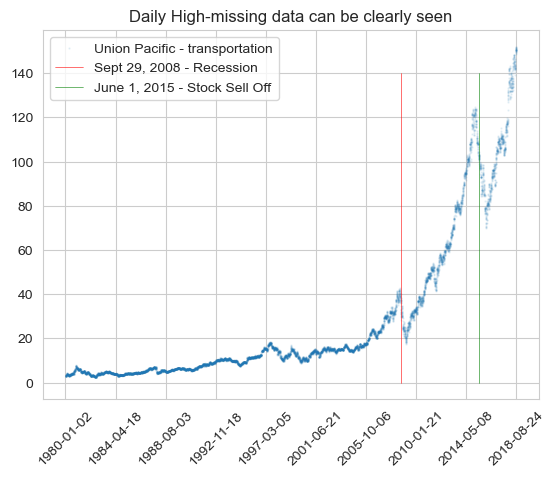

In [78]:
# we can plot Union Pacific now with the missing dates, it seems to know to plot the years on the x-axis now
# the issue is that it's not correctly spaced; the skips in time might not always be the same amount
#plt.plot(df_UNP.index,df_UNP['high'],label='Union Pacific - transportation',alpha=0.4)

plt.scatter(df_UNP_time_reindexed.index,df_UNP_time_reindexed['high'],label='Union Pacific - transportation',alpha=0.1,s=0.4)

plt.plot([days_to_crash.days,days_to_crash.days],[0,140],color='r',label='Sept 29, 2008 - Recession',linewidth=0.4)
plt.plot([days_to_sell_off.days,days_to_sell_off.days],[0,140],color='g',label='June 1, 2015 - Stock Sell Off',linewidth=0.4)


plt.title('Daily High-missing data can be clearly seen')

num_entries = df_UNP_time_reindexed.index.max()

# Set a desired number of ticks; in the cell above, we had num_segments = 9 (one less than num_ticks)
num_ticks = 10

# Generate equally spaced tick positions
tick_positions = np.linspace(0, num_entries - 1, num_ticks).astype(int)

# Set the ticks and their corresponding labels from the original dates
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

# Set x-axis limits to span the full range of the custom index
#plt.xlim(df_UNP_time_reindexed.index.min(), df_UNP_time_reindexed.index.max())

plt.legend()
plt.show()